In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
# Any results you write to the current directory are saved as output.

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv


In [2]:
temp_by_country = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

In [3]:
temp_by_country['dt'] = pd.to_datetime(temp_by_country['dt'])
temp_by_country['year'] = temp_by_country['dt'].dt.year
temp_by_country['month'] = temp_by_country['dt'].dt.month_name()
temp_by_country['day'] = temp_by_country['dt'].dt.day

In [4]:
india_temp = temp_by_country[temp_by_country['Country'] == 'India']
yearly_avg_temperature = pd.DataFrame(india_temp.groupby('year')['AverageTemperature'].mean()).reset_index()
yearly_avg_temperature = yearly_avg_temperature[yearly_avg_temperature['year'] > 1900]

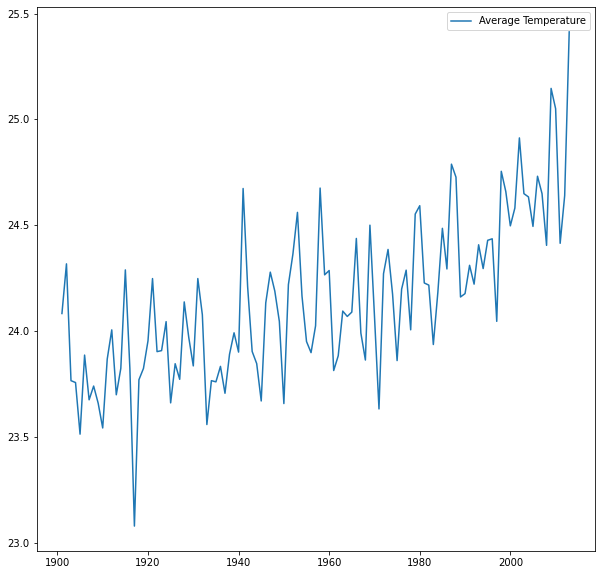

In [5]:
plt.figure(figsize=(10,10))
plt.plot(yearly_avg_temperature['year'], yearly_avg_temperature['AverageTemperature'], label = 'Average Temperature')
plt.legend()

In [6]:
temp_by_country

dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01               4.384                          2.294   
1      1743-12-01                 NaN                            NaN   
2      1744-01-01                 NaN                            NaN   
3      1744-02-01                 NaN                            NaN   
4      1744-03-01                 NaN                            NaN   
...           ...                 ...                            ...   
577457 2013-05-01              19.059                          1.022   
577458 2013-06-01              17.613                          0.473   
577459 2013-07-01              17.000                          0.453   
577460 2013-08-01              19.759                          0.717   
577461 2013-09-01                 NaN                            NaN   

         Country  year      month  day  
0          Åland  1743   November    1  
1          Åland  1743   December    1  
2          Åland  1744    January    1  
3          Åland  1744   February    1  
4          Åland  1744      March    1  
...          ...   ...        ...  ...  
577457  Zimbabwe  2013        May    1  
577458  Zimbabwe  2013       June    1  
577459  Zimbabwe  2013       July    1  
577460  Zimbabwe  2013     August    1  
577461  Zimbabwe  2013  September    1  

[577462 rows x 7 columns]

In [7]:
country_subset = temp_by_country[(temp_by_country['Country'] == 'India') | (temp_by_country['Country'] == 'Australia')]
country_subset = country_subset.groupby(['Country','year'], as_index = False)['AverageTemperature'].mean()
country_subset = country_subset[country_subset['year'] > 1900]
fig = px.line(country_subset, x="year", y="AverageTemperature", color='Country')
fig.show()

In [8]:
fig = px.scatter(country_subset, x="year", y="AverageTemperature", facet_col="Country", color="Country", trendline="ols")
fig.show()

In [9]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
temp_by_country['months'] = pd.Categorical(temp_by_country['month'], categories=months, ordered=True)
#temp_by_country[(temp_by_country['Country'] =='India') & (temp_by_country['year'] > 1900)].groupby(['year','months'],as_index = False)['AverageTemperature'].mean()

In [13]:
cities_data = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
cities_data = cities_data[(cities_data['City'] =='Bombay') | 
                          (cities_data['City'] == 'Delhi') | 
                          (cities_data['City']=='Bangalore') | 
                          (cities_data['City'] == 'Pune') |
                          (cities_data['City'] == 'Madras')  |
                          (cities_data['City']== 'Calcutta')]

cities_data = cities_data[cities_data['dt'] > '1920-01-01']
cities_data.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
631602  1920-02-01              25.006                          0.286   
631603  1920-03-01              27.575                          0.412   
631604  1920-04-01              27.749                          0.537   
631605  1920-05-01              27.858                          0.355   
631606  1920-06-01              25.374                          0.224   

             City Country Latitude Longitude  
631602  Bangalore   India   12.05N    77.26E  
631603  Bangalore   India   12.05N    77.26E  
631604  Bangalore   India   12.05N    77.26E  
631605  Bangalore   India   12.05N    77.26E  
631606  Bangalore   India   12.05N    77.26E

In [14]:
cities_data['dt'] = pd.to_datetime(cities_data['dt'])
cities_data['year'] = cities_data['dt'].dt.year
cities_data['month'] = cities_data['dt'].dt.month_name()
cities_data['day'] = cities_data['dt'].dt.day

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
cities_data['months'] = pd.Categorical(cities_data['month'], categories=months, ordered=True)
#temp_by_country[(temp_by_country['Country'] =='India') & (temp_by_country['year'] > 1900)].groupby(['year','months'],as_index = False)['AverageTemperature'].mean()

In [21]:
htmap = cities_data.groupby(['City','months'], as_index = False)['AverageTemperature'].mean()
#htmap.head()

trace = go.Heatmap(z=htmap['AverageTemperature'],
                   x=htmap['months'],
                   y=htmap['City']
                  )
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month',
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [34]:
recent_temperatures = temp_by_country[(temp_by_country['year'] > 1950)]
#recent_temperatures['dt'] = pd.to_datetime(recent_temperatures['dt'])
recent_temperatures.head()

# Creating the visualization for country by country
fig = px.choropleth(recent_temperatures, 
                    locations="Country", 
                    locationmode = "country names",
                    color="AverageTemperature", 
                    hover_name="Country", 
                    animation_frame="year")
fig.update_layout(
    title_text = 'Average Temperature',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
#fig.show()
#fig.write_html("kaggle/working/sampleplot.html")
py.iplot(fig, filename='/kaggle/working/sampleplot.html')